In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#part 1 Minmum-Tracing-Error Frontier
#
#
#parameters setting
filename_market_portfolio = "Exam_Market.xlsx"
filename_industry_portfolios = "Exam_Industries.xlsx"


# df_market_portfolio = pd.read_csv(filename_market_portfolio, index_col=0)
# df_industry_portfolios = pd.read_csv(filename_industry_portfolios, index_col=0)
df_market_portfolio = pd.read_excel(filename_market_portfolio, index_col=0)
df_industry_portfolios = pd.read_excel(filename_industry_portfolios, index_col=0)
df = pd.merge(df_market_portfolio,df_industry_portfolios, right_index=True, left_index=True, how = "inner")

lst_industry_names = list(df_industry_portfolios.columns)
df1 = df.copy()

market = df_market_portfolio.columns[0]
lst_excess_names = []
for name in lst_industry_names:
    col = name + "-Rm"
    lst_excess_names.append(col)
    df1[col] = df1[name] - df1[market]

#Ri = E(Ri-Rm)
se_excess_returns = df1[lst_excess_names].apply(np.mean)

se_excess_returns

Cnsmr-Rm   -0.032250
Manuf-Rm   -0.216250
HiTec-Rm    0.221250
Hlth -Rm    0.097000
Other-Rm    0.038417
dtype: float64

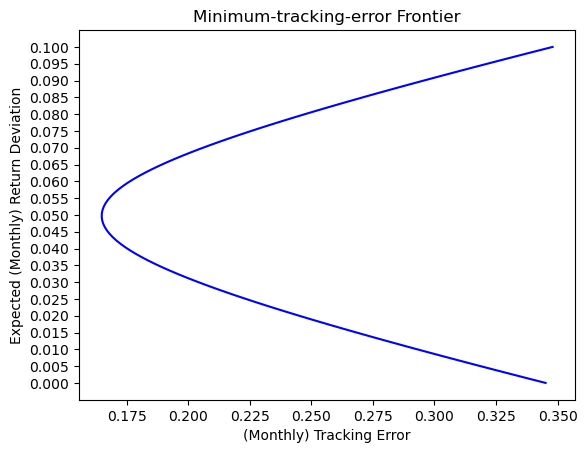

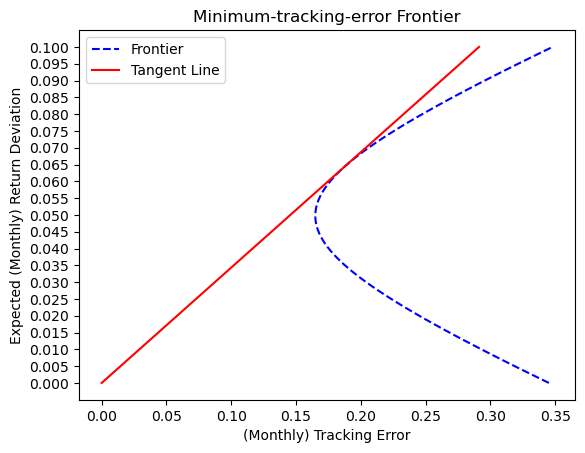

In [9]:
df_covs = df1[lst_excess_names].cov()

V = df_covs.copy()
V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

R = se_excess_returns
e = pd.Series([1]*len(V))
e.index = R.index

alpha = R.dot(V_inv).dot(e)
zeta = R.dot(V_inv).dot(R)
delta = e.dot(V_inv).dot(e)

R_mv = alpha/delta


#parameters setting
R_p_start = 0
R_p_end = 0.1

yticks_start = 0
yticks_end = 0.105
yticks_increment = 0.005

xlabel = '(Monthly) Tracking Error'
ylabel = 'Expected (Monthly) Return Deviation'
title = 'Minimum-tracking-error Frontier'

#from 0% to 0.1% on the vertical axis
R_p = np.linspace(R_p_start, R_p_end, 100) 

sigma_p = np.sqrt(1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)

plt.plot(sigma_p, R_p, color='blue', linestyle='-')

plt.yticks(np.arange(yticks_start, yticks_end, yticks_increment))
#plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show() 


#parameters setting
R_p_riskless_start = 0
R_p_riskless_end = 0.1

yticks_start = 0
yticks_end = 0.105
yticks_increment = 0.005

label1 = "Frontier"
label2 = "Tangent Line"

xlabel = '(Monthly) Tracking Error'
ylabel = 'Expected (Monthly) Return Deviation'
title = 'Minimum-tracking-error Frontier'
#plot the line starting from the origin
R_f = 0


#R_p = np.linspace(0, 0.1, 100) 
R_p_riskless = np.linspace(R_p_riskless_start, R_p_riskless_end, 100) 

#R_p = R_mv + np.sqrt((sigma_p**2-1/delta)*(zeta*delta-alpha**2)/delta)
sigma_p_riskless = (R_p_riskless-R_f)/np.sqrt(zeta - 2*alpha*R_f + delta*(R_f**2))

plt.plot(sigma_p, R_p, color='blue', linestyle='--', label = label1)
plt.plot(sigma_p_riskless, R_p_riskless, color='red', linestyle='-', label = label2)

plt.yticks(np.arange(yticks_start, yticks_end, yticks_increment))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show() 

In [10]:
information_ratio = np.sqrt(zeta - 2*alpha*R_f + delta*R_f**2)
print(information_ratio)

0.3434120042131845


In [11]:
R_tg = (alpha*R_f - zeta)/(delta*R_f - alpha)
R_tg
a = (zeta*V_inv.dot(e)-alpha*V_inv.dot(R))/(zeta*delta-alpha**2)
b = (delta*V_inv.dot(R) - alpha*V_inv.dot(e))/(zeta*delta-alpha**2)
w_star = a + b*R_tg

print(w_star)

Cnsmr-Rm    0.169349
Manuf-Rm    0.130102
HiTec-Rm    0.353404
Hlth -Rm    0.110988
Other-Rm    0.236158
dtype: float64


# Briefly explain (in words) the economic significance of this "tangency" portfolio

**Tangency portfolio has the highest possible Sharpe ratio.**
>**Optimal Risk-Return Tradeoff**: The tangency portfolio is the portfolio on the efficient frontier that is tangent to the Capital Market Line (CML). It represents the optimal risk-return tradeoff available to investors in the context of a risk-free asset. Investing in the tangency portfolio allows investors to maximize their expected return for a given level of risk, or conversely, minimize risk for a desired level of return.

>**Portfolio Construction**: Investors can use the tangency portfolio as a building block for constructing their own portfolios. By combining the tangency portfolio with a risk-free asset, they can create portfolios that align with their risk preferences and financial objectives. This approach is central to the CAPM and modern portfolio theory.

>**Capital Market Line**: The tangency portfolio's connection to the CML is important because it provides a benchmark for evaluating the performance of investment portfolios. Investors can compare the returns of their portfolios with the CML, which represents the market's optimal risk-return tradeoff. This comparison helps assess whether their investments are meeting or exceeding market efficiency standards.

>**Asset Allocation**: The tangency portfolio aids in asset allocation decisions. Investors can determine the proportion of their portfolio to allocate to the risk-free asset and the tangency portfolio, depending on their risk tolerance and return objectives. This allocation strategy helps balance risk and return in a manner consistent with their financial goals.